# ARIMA
Autoregressive Integrated Moving Average (ARIMA) model.

ARIMA is widely popular because it effectively models time series data by incorporating both autoregressive and moving average components, while also addressing non-stationarity through differencing.

In fields such as finance, economics, and environmental sciences, ARIMA has gained significant attention due to its ability to capture complex patterns in historical data and make reliable forecasts. This capability makes it a state-of-the-art technique for time series analysis. ARIMA is a robust and widely-used method for generating accurate and actionable predictions.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [27]:
df = pd.read_excel('../data_excel/Dannye_FNB.xlsx', header=2)

df = df[:25] # delete footnotes
df.drop(columns=['№ п/п', 'Январь 2008*'], inplace=True)
df.drop(index=0, inplace=True)

# Melt the dataframe to long format
df_long = pd.melt(
    df,
    id_vars=["Показатель"],
    var_name="ds",
    value_name="y"
)

# Convert "ds" to datetime
df_long["ds"] = pd.to_datetime(df_long["ds"])

# Filter for a specific indicator (e.g., "Поступления")
prophet_data = df_long[df_long["Показатель"] == "Объем на конец периода"][["ds", "y"]]

# Drop rows with missing values (if needed)
prophet_data = prophet_data.dropna()

# Clean the 'y' column and convert it to numeric type
prophet_data = prophet_data.map(lambda x: str(x).replace(' ', '').replace(',', '.').replace('***', '') if isinstance(x, str) else x)
prophet_data['y'] = prophet_data['y'].apply(pd.to_numeric, errors='coerce')

In [28]:
prophet_data = prophet_data.set_index('ds')
prophet_data.tail()

,y
ds,
2024-08-01,12165.77
2024-09-01,12787.13
2024-10-01,12726.20
2024-11-01,13096.72
2024-12-01,11879.97


When building an ARIMA model, we need to carefully consider the three key parameters: p, d, and q.

* The first parameter, p, represents the number of lagged observations in the autoregressive (AR) component. It determines how far back in time the model looks to predict the current observation. This is typically identified by analyzing the autocorrelations of the time series, which measure the correlation between observations at different time lags.

* The second parameter, d, refers to the order of differencing. Differencing is the process of computing the differences between consecutive observations to make the time series stationary. Stationarity ensures that the data has a constant mean and variance over time, which is a key assumption of ARIMA models. The value of d indicates how many times differencing is applied to achieve stationarity.

* The third parameter, q, represents the order of the moving average (MA) component. It specifies the number of lagged forecast errors included in the model. Unlike a simple moving average, which smooths the data, the MA component in ARIMA captures the relationship between an observation and the residual errors from a moving average model applied to lagged observations.



In [34]:
mod = sm.tsa.ARIMA(endog=prophet_data['y'], 
                         order=(12, 0, 0))
res = mod.fit()
print(res.summary())

c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  203
Model:                ARIMA(12, 0, 0)   Log Likelihood               -1559.976
Date:                Wed, 05 Feb 2025   AIC                           3147.951
Time:                        12:55:50   BIC                           3194.336
Sample:                    02-01-2008   HQIC                          3166.717
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6158.5780   3509.364      1.755      0.079    -719.648     1.3e+04
ar.L1          0.9415      0.062     15.265      0.000       0.821       1.062
ar.L2          0.1461      0.078      1.882      0.0

In [35]:
forecast = res.forecast(steps=12)
forecast

2025-01-01    11910.731846
2025-02-01    11721.872920
2025-03-01    11689.115483
2025-04-01    11561.549793
2025-05-01    11697.209081
2025-06-01    11584.164155
2025-07-01    11676.401299
2025-08-01    11226.565145
2025-09-01    11220.034047
2025-10-01    11193.696116
2025-11-01    11139.027412
2025-12-01    11062.829555
Freq: MS, Name: predicted_mean, dtype: float64

In [38]:
print(f"AIC: {res.aic}")
print(f"BIC: {res.bic}")

AIC: 3147.951099870039
BIC: 3194.335983576624


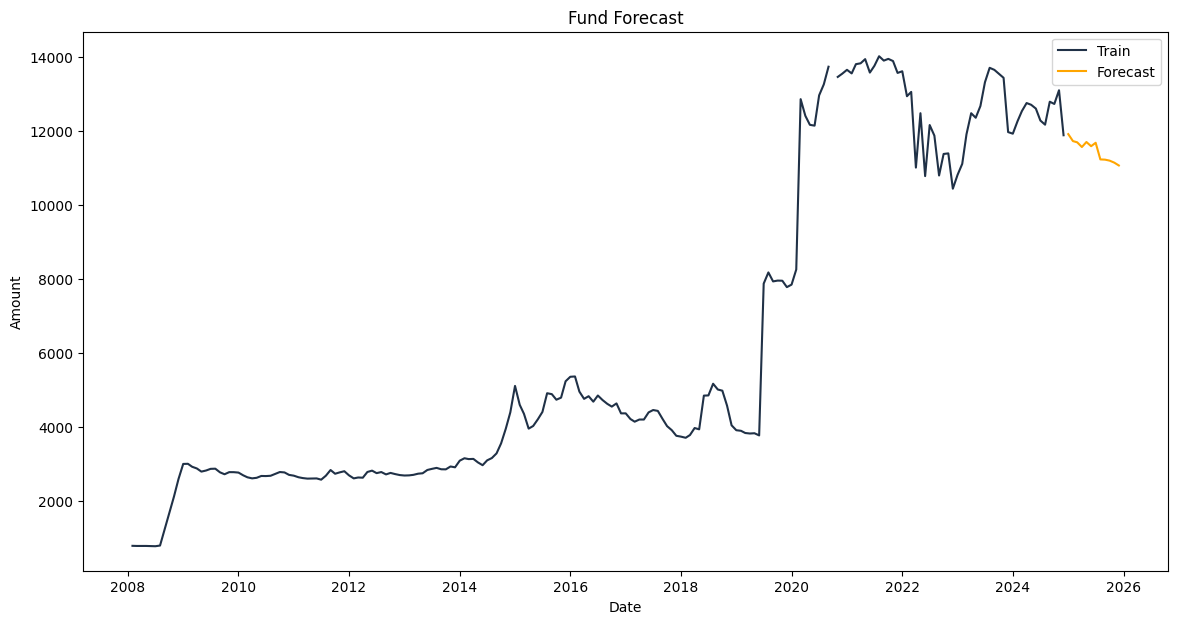

In [37]:
# Plot the results with specified colors
plt.figure(figsize=(14,7))
plt.plot(prophet_data.index, prophet_data["y"], label='Train', color='#203147')
plt.plot(forecast.index, forecast, label='Forecast', color='orange')
plt.title('Fund Forecast')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()